In [1]:
from config import *
from map_wrapper import *

In [2]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()

In [5]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [6]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [7]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [8]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [9]:
data_city=get_sub_stats_by_col(data,'city')
data_city.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,17947,3750,15000,45000,24560,9.80%
2,上海,16390,5250,15000,37500,44024,17.57%
8,深圳,16295,5250,15000,37500,35663,14.24%
3,杭州,15050,3750,13000,32500,12918,5.16%
5,广州,13740,3750,12500,30000,27284,10.89%
10,南京,13350,4231,12500,30000,13685,5.46%
6,成都,12327,2500,11500,30000,11778,4.70%
11,苏州,12085,3750,11500,25617,7083,2.83%
14,东莞,12082,4000,12500,22500,2725,1.09%
1,武汉,11824,3750,11000,26000,14572,5.82%


In [10]:
describe(data_city,'程序员')

2019年12月北京招收程序员24560人。2019年12月北京程序员平均工资17947元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年12月上海招收程序员44024人。2019年12月上海程序员平均工资16390元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年12月深圳招收程序员35663人。2019年12月深圳程序员平均工资16295元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年12月杭州招收程序员12918人。2019年12月杭州程序员平均工资15050元，工资中位数13000元，其中95%的人的工资介于3750元到32500元。

2019年12月广州招收程序员27284人。2019年12月广州程序员平均工资13740元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年12月南京招收程序员13685人。2019年12月南京程序员平均工资13350元，工资中位数12500元，其中95%的人的工资介于4231元到30000元。

2019年12月成都招收程序员11778人。2019年12月成都程序员平均工资12327元，工资中位数11500元，其中95%的人的工资介于2500元到30000元。

2019年12月苏州招收程序员7083人。2019年12月苏州程序员平均工资12085元，工资中位数11500元，其中95%的人的工资介于3750元到25617元。

2019年12月东莞招收程序员2725人。2019年12月东莞程序员平均工资12082元，工资中位数12500元，其中95%的人的工资介于4000元到22500元。

2019年12月武汉招收程序员14572人。2019年12月武汉程序员平均工资11824元，工资中位数11000元，其中95%的人的工资介于3750元到26000元。

2019年12月大连招收程序员9260人。2019年12月大连程序员平均工资11710元，工资中位数9000元，其中95%的人的工资介于2500元到34000元。

2019年12月长沙招收程序员5725人。2019年12月长沙程序员平均工资11402元，工资中位数11000元，其中95%的人的工资介于

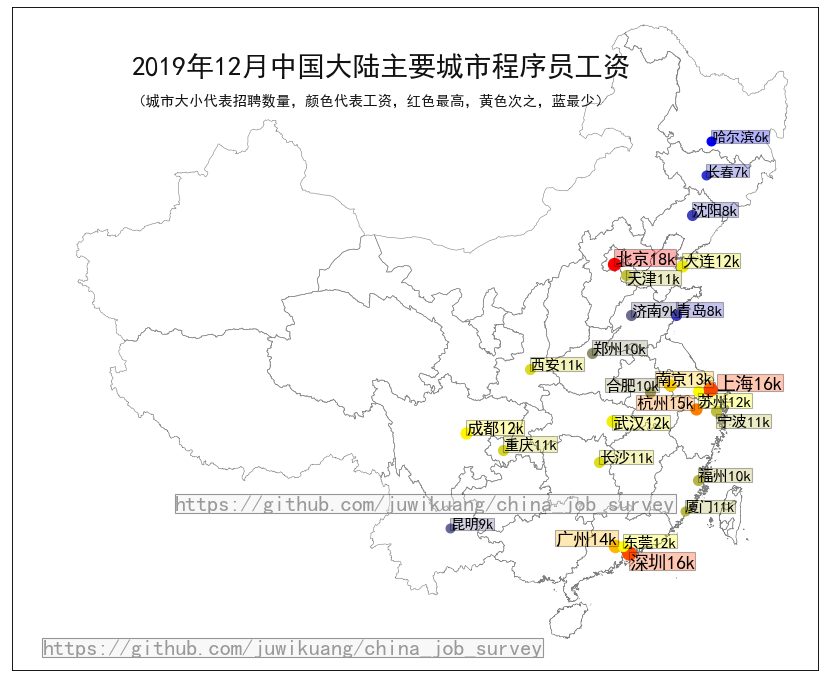

In [12]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [13]:
data_blockchain=get_sub_stats_by_col(data[(data.expert_blockchain==1)],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,上海,27537,11500,26333,62500,81,13.17%
17,天津,25000,25000,25000,25000,1,0.16%
3,深圳,23450,2500,22500,56845,110,17.89%
15,厦门,22500,12500,22500,32500,2,0.33%
5,北京,19657,4669,17500,40000,68,11.06%
11,郑州,18643,9000,18643,22500,7,1.14%
1,广州,18416,6000,15000,30188,219,35.61%
9,南京,17292,12500,15938,37500,12,1.95%
7,杭州,16927,2500,19429,29819,33,5.37%
10,大连,16800,9500,15500,30000,5,0.81%


In [14]:
describe(data_blockchain,'区块链工程师')

2019年12月上海招收区块链工程师81人。2019年12月上海区块链工程师平均工资27537元，工资中位数26333元，其中95%的人的工资介于11500元到62500元。

2019年12月天津招收区块链工程师1人。2019年12月天津区块链工程师平均工资25000元，工资中位数25000元，其中95%的人的工资介于25000元到25000元。

2019年12月深圳招收区块链工程师110人。2019年12月深圳区块链工程师平均工资23450元，工资中位数22500元，其中95%的人的工资介于2500元到56845元。

2019年12月厦门招收区块链工程师2人。2019年12月厦门区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于12500元到32500元。

2019年12月北京招收区块链工程师68人。2019年12月北京区块链工程师平均工资19657元，工资中位数17500元，其中95%的人的工资介于4669元到40000元。

2019年12月郑州招收区块链工程师7人。2019年12月郑州区块链工程师平均工资18643元，工资中位数18643元，其中95%的人的工资介于9000元到22500元。

2019年12月广州招收区块链工程师219人。2019年12月广州区块链工程师平均工资18416元，工资中位数15000元，其中95%的人的工资介于6000元到30188元。

2019年12月南京招收区块链工程师12人。2019年12月南京区块链工程师平均工资17292元，工资中位数15938元，其中95%的人的工资介于12500元到37500元。

2019年12月杭州招收区块链工程师33人。2019年12月杭州区块链工程师平均工资16927元，工资中位数19429元，其中95%的人的工资介于2500元到29819元。

2019年12月大连招收区块链工程师5人。2019年12月大连区块链工程师平均工资16800元，工资中位数15500元，其中95%的人的工资介于9500元到30000元。

2019年12月宁波招收区块链工程师2人。2019年12月宁波区块链工程师平均工资16166元，工资中位数16166元，其中95%的人的工资介于11500元到20833元。

2019年12月成都招收区块链工程师34人。2019年12月

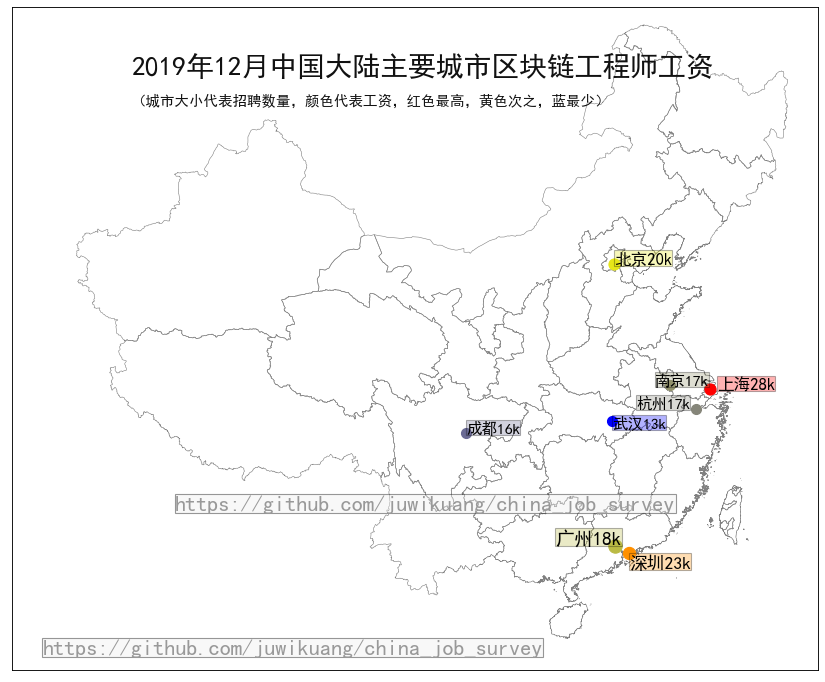

In [15]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 算法工程师

In [16]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,22211,5000,20000,50906,3151,13.78%
1,上海,21748,6768,20000,45000,4567,19.98%
5,深圳,20190,5250,17500,45000,3749,16.40%
8,杭州,18332,3750,17500,45000,1453,6.36%
3,广州,18028,4631,16000,40000,2293,10.03%
17,南京,17391,4885,16000,35000,1225,5.36%
14,苏州,16611,5500,15000,36357,901,3.94%
9,成都,15350,5250,14000,31250,1019,4.46%
10,武汉,15242,4000,15000,27500,1172,5.13%
18,合肥,14645,5688,12500,34792,245,1.07%


In [17]:
describe(data_city_algorithm,'算法工程师')

2019年12月北京招收算法工程师3151人。2019年12月北京算法工程师平均工资22211元，工资中位数20000元，其中95%的人的工资介于5000元到50906元。

2019年12月上海招收算法工程师4567人。2019年12月上海算法工程师平均工资21748元，工资中位数20000元，其中95%的人的工资介于6768元到45000元。

2019年12月深圳招收算法工程师3749人。2019年12月深圳算法工程师平均工资20190元，工资中位数17500元，其中95%的人的工资介于5250元到45000元。

2019年12月杭州招收算法工程师1453人。2019年12月杭州算法工程师平均工资18332元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2019年12月广州招收算法工程师2293人。2019年12月广州算法工程师平均工资18028元，工资中位数16000元，其中95%的人的工资介于4631元到40000元。

2019年12月南京招收算法工程师1225人。2019年12月南京算法工程师平均工资17391元，工资中位数16000元，其中95%的人的工资介于4885元到35000元。

2019年12月苏州招收算法工程师901人。2019年12月苏州算法工程师平均工资16611元，工资中位数15000元，其中95%的人的工资介于5500元到36357元。

2019年12月成都招收算法工程师1019人。2019年12月成都算法工程师平均工资15350元，工资中位数14000元，其中95%的人的工资介于5250元到31250元。

2019年12月武汉招收算法工程师1172人。2019年12月武汉算法工程师平均工资15242元，工资中位数15000元，其中95%的人的工资介于4000元到27500元。

2019年12月合肥招收算法工程师245人。2019年12月合肥算法工程师平均工资14645元，工资中位数12500元，其中95%的人的工资介于5688元到34792元。

2019年12月西安招收算法工程师645人。2019年12月西安算法工程师平均工资14444元，工资中位数12953元，其中95%的人的工资介于5250元到34187元。

2019年12月厦门招收算法工程师85人。2019年12月厦门算法工程

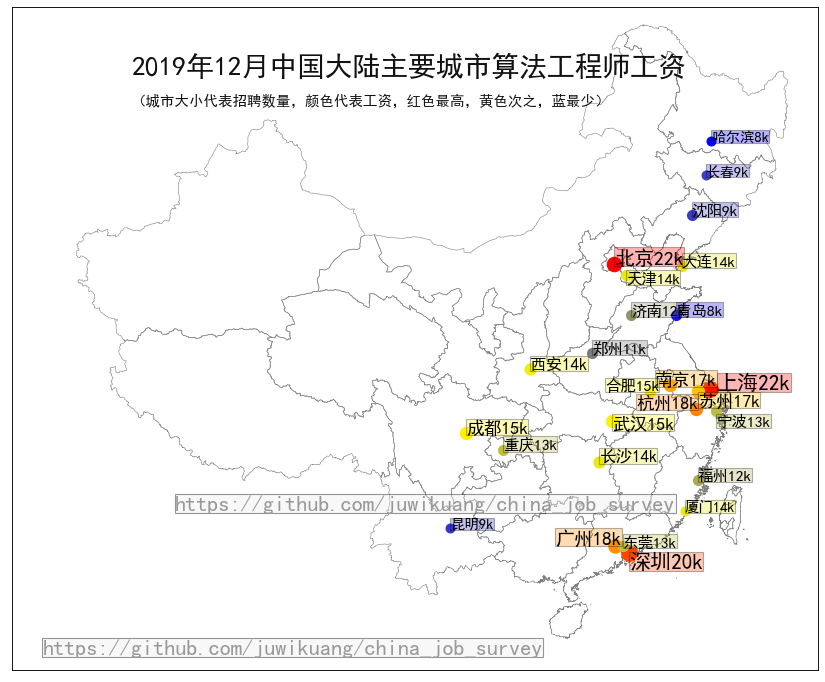

In [18]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市算法工程师工资')

# 系统架构师

In [19]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
6,北京,31990,8975,32500,55000,1179,14.23%
9,深圳,26251,7000,25000,52500,1108,13.37%
3,杭州,25385,9116,25000,48500,458,5.53%
4,上海,22927,7000,22500,50000,1798,21.69%
2,广州,20938,5250,20000,45000,1247,15.05%
5,南京,20816,4852,20000,38062,415,5.01%
10,成都,19121,7521,18750,38375,326,3.93%
0,大连,17998,7971,16750,39722,84,1.01%
14,东莞,17431,6725,18250,28303,78,0.94%
21,郑州,17346,6500,17500,30000,13,0.16%


In [20]:
describe(data_city_architect,'系统架构师')

2019年12月北京招收系统架构师1179人。2019年12月北京系统架构师平均工资31990元，工资中位数32500元，其中95%的人的工资介于8975元到55000元。

2019年12月深圳招收系统架构师1108人。2019年12月深圳系统架构师平均工资26251元，工资中位数25000元，其中95%的人的工资介于7000元到52500元。

2019年12月杭州招收系统架构师458人。2019年12月杭州系统架构师平均工资25385元，工资中位数25000元，其中95%的人的工资介于9116元到48500元。

2019年12月上海招收系统架构师1798人。2019年12月上海系统架构师平均工资22927元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2019年12月广州招收系统架构师1247人。2019年12月广州系统架构师平均工资20938元，工资中位数20000元，其中95%的人的工资介于5250元到45000元。

2019年12月南京招收系统架构师415人。2019年12月南京系统架构师平均工资20816元，工资中位数20000元，其中95%的人的工资介于4852元到38062元。

2019年12月成都招收系统架构师326人。2019年12月成都系统架构师平均工资19121元，工资中位数18750元，其中95%的人的工资介于7521元到38375元。

2019年12月大连招收系统架构师84人。2019年12月大连系统架构师平均工资17998元，工资中位数16750元，其中95%的人的工资介于7971元到39722元。

2019年12月东莞招收系统架构师78人。2019年12月东莞系统架构师平均工资17431元，工资中位数18250元，其中95%的人的工资介于6725元到28303元。

2019年12月郑州招收系统架构师13人。2019年12月郑州系统架构师平均工资17346元，工资中位数17500元，其中95%的人的工资介于6500元到30000元。

2019年12月长沙招收系统架构师122人。2019年12月长沙系统架构师平均工资17295元，工资中位数16938元，其中95%的人的工资介于9367元到33741元。

2019年12月武汉招收系统架构师415人。2019年12月武汉系统架构师平均工资1

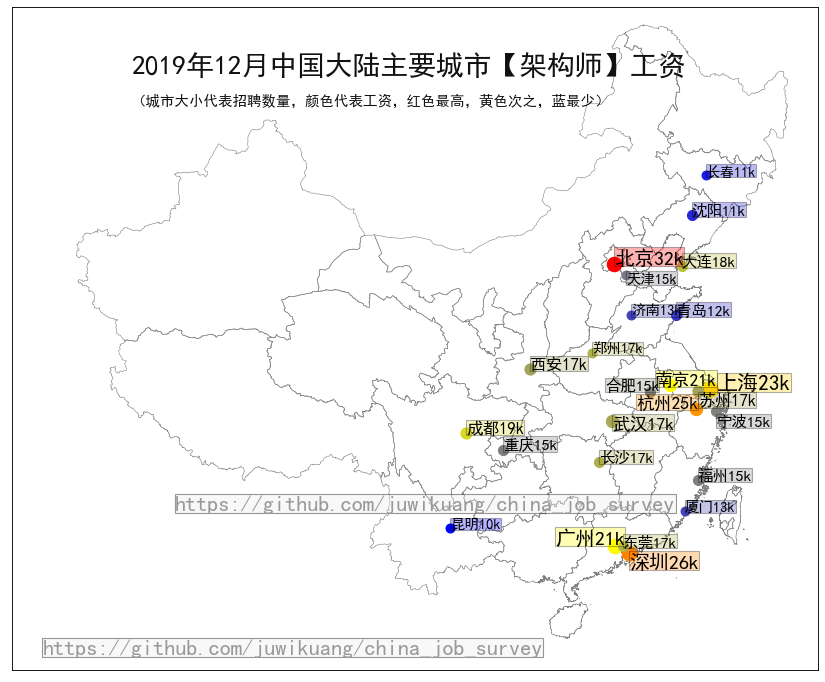

In [21]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [22]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,14286,12500,14167,15000,7,21.88%
3,苏州,12500,12500,12500,12500,1,3.12%
1,广州,12100,7000,13125,15000,10,31.25%
5,上海,9800,8000,9800,12500,5,15.62%
4,武汉,9000,9000,9000,9000,1,3.12%
6,南京,9000,9000,9000,9000,3,9.38%
2,深圳,7500,7500,7500,7500,5,15.62%


In [23]:
describe(data_bio,'生物信息工程师')

2019年12月北京招收生物信息工程师7人。2019年12月北京生物信息工程师平均工资14286元，工资中位数14167元，其中95%的人的工资介于12500元到15000元。

2019年12月苏州招收生物信息工程师1人。2019年12月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年12月广州招收生物信息工程师10人。2019年12月广州生物信息工程师平均工资12100元，工资中位数13125元，其中95%的人的工资介于7000元到15000元。

2019年12月上海招收生物信息工程师5人。2019年12月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年12月武汉招收生物信息工程师1人。2019年12月武汉生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年12月南京招收生物信息工程师3人。2019年12月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年12月深圳招收生物信息工程师5人。2019年12月深圳生物信息工程师平均工资7500元，工资中位数7500元，其中95%的人的工资介于7500元到7500元。



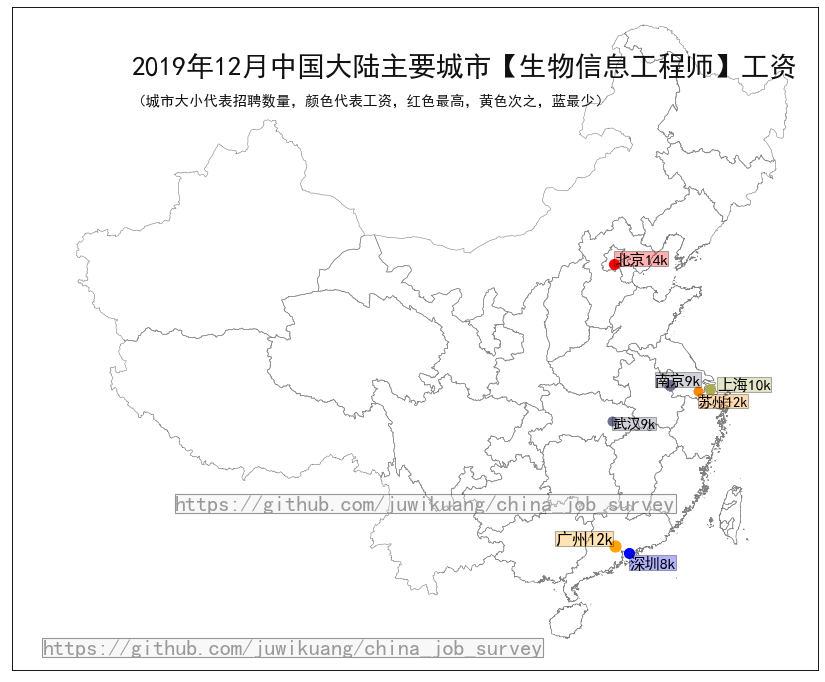

In [24]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [25]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
8,北京,15300,1750,16250,34375,25,7.20%
4,上海,13219,4838,12500,29562,98,28.24%
0,武汉,12591,7000,11833,20000,11,3.17%
3,深圳,11833,5250,10900,22187,45,12.97%
1,广州,11303,7000,11625,17050,38,10.95%
5,长沙,9474,7000,9200,12500,19,5.48%
7,成都,7184,6000,6250,14125,38,10.95%
16,合肥,6944,6000,7000,7000,18,5.19%
15,西安,6083,5250,6250,6250,12,3.46%


In [26]:
describe(data_spider, '爬虫工程师')

2019年12月北京招收爬虫工程师25人。2019年12月北京爬虫工程师平均工资15300元，工资中位数16250元，其中95%的人的工资介于1750元到34375元。

2019年12月上海招收爬虫工程师98人。2019年12月上海爬虫工程师平均工资13219元，工资中位数12500元，其中95%的人的工资介于4838元到29562元。

2019年12月武汉招收爬虫工程师11人。2019年12月武汉爬虫工程师平均工资12591元，工资中位数11833元，其中95%的人的工资介于7000元到20000元。

2019年12月深圳招收爬虫工程师45人。2019年12月深圳爬虫工程师平均工资11833元，工资中位数10900元，其中95%的人的工资介于5250元到22187元。

2019年12月广州招收爬虫工程师38人。2019年12月广州爬虫工程师平均工资11303元，工资中位数11625元，其中95%的人的工资介于7000元到17050元。

2019年12月长沙招收爬虫工程师19人。2019年12月长沙爬虫工程师平均工资9474元，工资中位数9200元，其中95%的人的工资介于7000元到12500元。

2019年12月成都招收爬虫工程师38人。2019年12月成都爬虫工程师平均工资7184元，工资中位数6250元，其中95%的人的工资介于6000元到14125元。

2019年12月合肥招收爬虫工程师18人。2019年12月合肥爬虫工程师平均工资6944元，工资中位数7000元，其中95%的人的工资介于6000元到7000元。

2019年12月西安招收爬虫工程师12人。2019年12月西安爬虫工程师平均工资6083元，工资中位数6250元，其中95%的人的工资介于5250元到6250元。



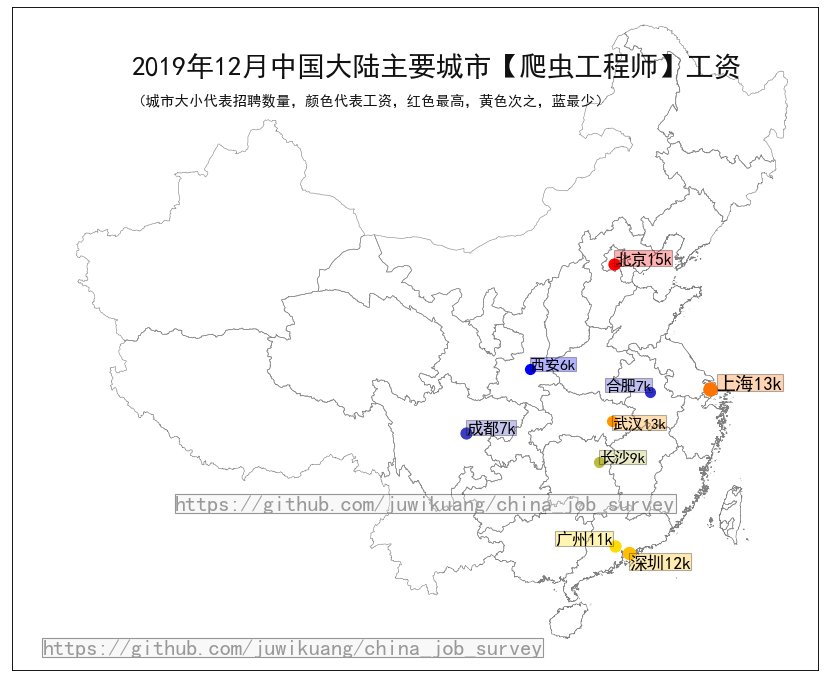

In [27]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [28]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,北京,17025,3750,15000,40000,11849,10.43%
12,深圳,16478,6000,15000,35000,14730,12.96%
4,上海,16467,5250,15000,36268,19131,16.83%
1,杭州,14979,3500,13333,30000,6092,5.36%
9,广州,13956,3750,12500,30000,13395,11.79%
17,东莞,13031,5250,12500,22500,995,0.88%
7,南京,12989,3750,12500,27500,7381,6.49%
3,大连,12440,2500,10444,30000,5136,4.52%
8,苏州,11737,4500,11500,24000,2488,2.19%
2,成都,11733,2500,11500,26356,4683,4.12%


In [29]:
describe(data_java, 'Java程序员')

2019年12月北京招收Java程序员11849人。2019年12月北京Java程序员平均工资17025元，工资中位数15000元，其中95%的人的工资介于3750元到40000元。

2019年12月深圳招收Java程序员14730人。2019年12月深圳Java程序员平均工资16478元，工资中位数15000元，其中95%的人的工资介于6000元到35000元。

2019年12月上海招收Java程序员19131人。2019年12月上海Java程序员平均工资16467元，工资中位数15000元，其中95%的人的工资介于5250元到36268元。

2019年12月杭州招收Java程序员6092人。2019年12月杭州Java程序员平均工资14979元，工资中位数13333元，其中95%的人的工资介于3500元到30000元。

2019年12月广州招收Java程序员13395人。2019年12月广州Java程序员平均工资13956元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年12月东莞招收Java程序员995人。2019年12月东莞Java程序员平均工资13031元，工资中位数12500元，其中95%的人的工资介于5250元到22500元。

2019年12月南京招收Java程序员7381人。2019年12月南京Java程序员平均工资12989元，工资中位数12500元，其中95%的人的工资介于3750元到27500元。

2019年12月大连招收Java程序员5136人。2019年12月大连Java程序员平均工资12440元，工资中位数10444元，其中95%的人的工资介于2500元到30000元。

2019年12月苏州招收Java程序员2488人。2019年12月苏州Java程序员平均工资11737元，工资中位数11500元，其中95%的人的工资介于4500元到24000元。

2019年12月成都招收Java程序员4683人。2019年12月成都Java程序员平均工资11733元，工资中位数11500元，其中95%的人的工资介于2500元到26356元。

2019年12月武汉招收Java程序员5587人。2019年12月武汉Java程序员平均工资11648元，工资中位数10500元，其中95%的人的工资介于

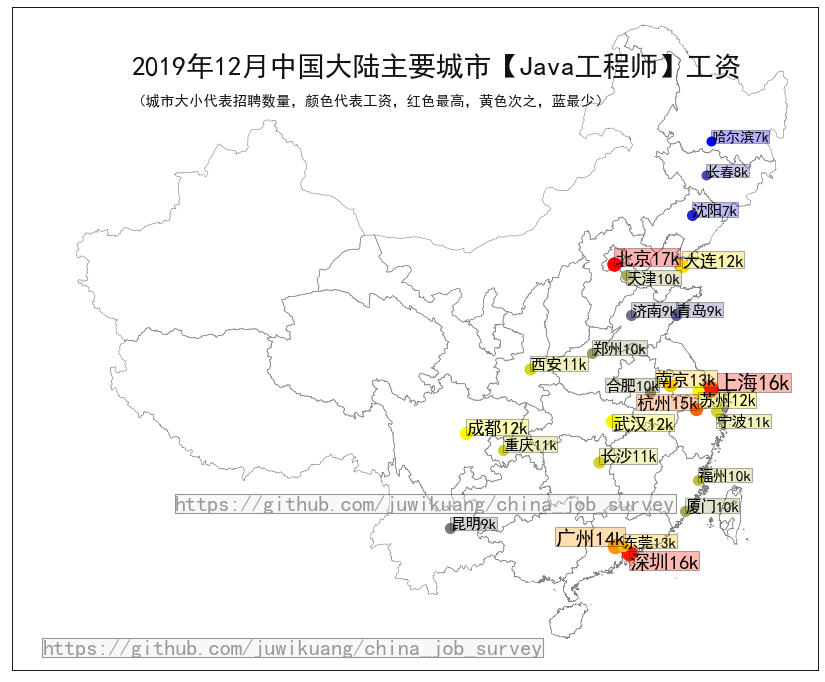

In [30]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [31]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,23111,3750,20785,58333,4238,15.12%
2,上海,20586,6250,18500,45000,5898,21.04%
5,深圳,19604,6794,17500,40000,3687,13.15%
4,杭州,17086,3750,16500,35000,1481,5.28%
1,广州,16731,3750,15000,37771,2967,10.58%
7,成都,15565,3750,14250,34813,1470,5.24%
8,苏州,15224,5250,13000,39875,741,2.64%
9,武汉,14921,5000,13400,35000,1269,4.53%
6,南京,14822,4860,14000,33417,1838,6.56%
13,重庆,14039,3482,12500,35000,365,1.30%


In [32]:
describe(data_python, 'Python程序员')

2019年12月北京招收Python程序员4238人。2019年12月北京Python程序员平均工资23111元，工资中位数20785元，其中95%的人的工资介于3750元到58333元。

2019年12月上海招收Python程序员5898人。2019年12月上海Python程序员平均工资20586元，工资中位数18500元，其中95%的人的工资介于6250元到45000元。

2019年12月深圳招收Python程序员3687人。2019年12月深圳Python程序员平均工资19604元，工资中位数17500元，其中95%的人的工资介于6794元到40000元。

2019年12月杭州招收Python程序员1481人。2019年12月杭州Python程序员平均工资17086元，工资中位数16500元，其中95%的人的工资介于3750元到35000元。

2019年12月广州招收Python程序员2967人。2019年12月广州Python程序员平均工资16731元，工资中位数15000元，其中95%的人的工资介于3750元到37771元。

2019年12月成都招收Python程序员1470人。2019年12月成都Python程序员平均工资15565元，工资中位数14250元，其中95%的人的工资介于3750元到34813元。

2019年12月苏州招收Python程序员741人。2019年12月苏州Python程序员平均工资15224元，工资中位数13000元，其中95%的人的工资介于5250元到39875元。

2019年12月武汉招收Python程序员1269人。2019年12月武汉Python程序员平均工资14921元，工资中位数13400元，其中95%的人的工资介于5000元到35000元。

2019年12月南京招收Python程序员1838人。2019年12月南京Python程序员平均工资14822元，工资中位数14000元，其中95%的人的工资介于4860元到33417元。

2019年12月重庆招收Python程序员365人。2019年12月重庆Python程序员平均工资14039元，工资中位数12500元，其中95%的人的工资介于3482元到35000元。

2019年12月厦门招收Python程序员91人。2019年12月厦门Python程

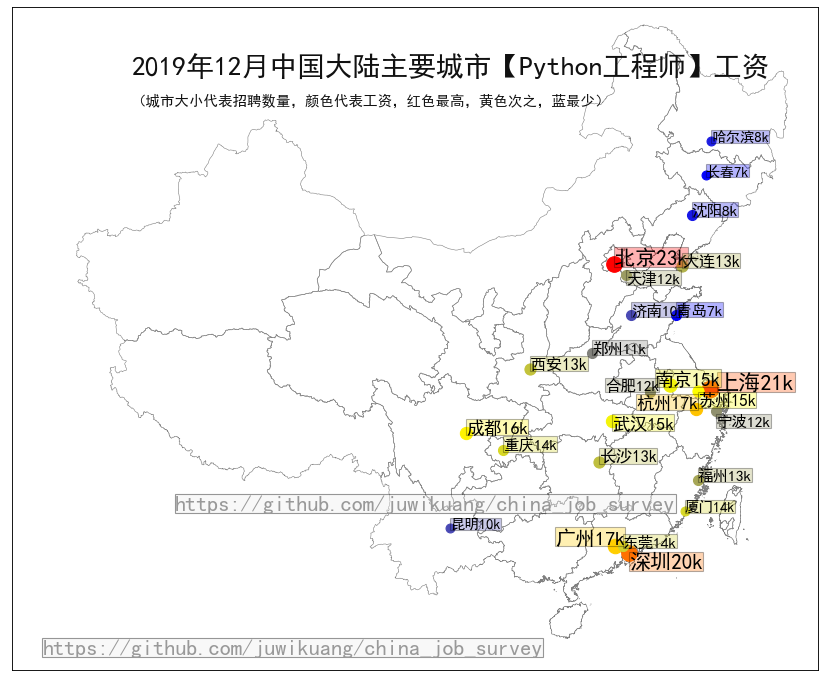

In [33]:
draw_city_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')

In [34]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

In [35]:
del history_data['Id']

In [36]:
history_data.head()

,Month,City,Salary
0,201906,哈尔滨,5983
1,201906,杭州,14707
2,201906,厦门,9789
3,201906,苏州,11197
4,201906,长沙,10852


In [37]:
data_hangzhou = history_data[history_data.City=='杭州']

In [38]:
del data_hangzhou['City']

In [39]:
import matplotlib.pyplot as plt

In [40]:
data_hangzhou.Salary.values

array([14707, 14980, 15106, 14980, 14758, 14921, 15050], dtype=int64)

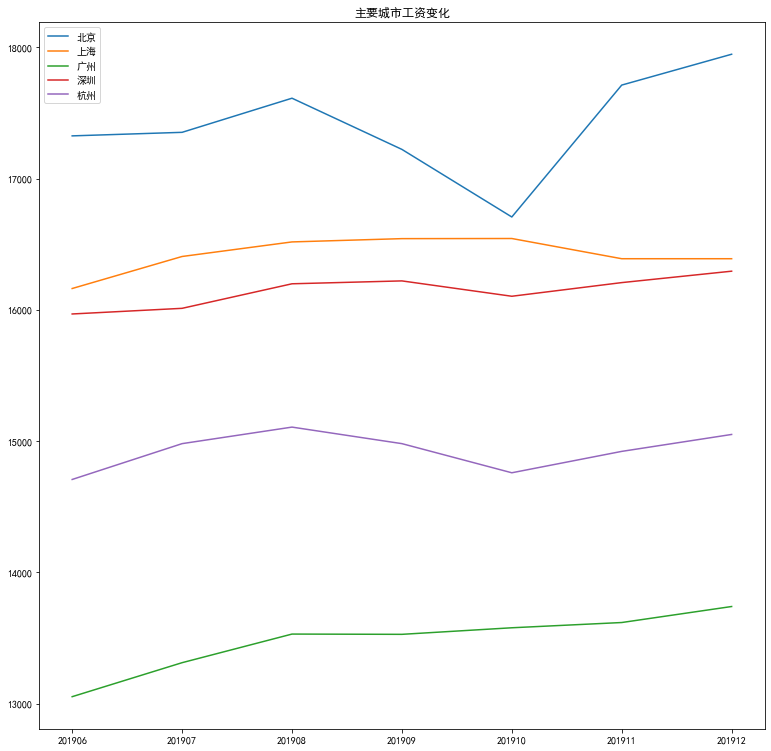

In [41]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()